In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
file = pd.read_csv("data.csv")
time_labels = [0, 995, 4844, 8757, 12635, 16102, 19470]

In [14]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        167 non-null    int64  
 1   Ikz2_0       167 non-null    float64
 2   Ikz2_995     167 non-null    float64
 3   Ikz2_4844    167 non-null    float64
 4   Ikz2_8757    167 non-null    float64
 5   Ikz2_12635   167 non-null    float64
 6   Ikz2_16102   167 non-null    float64
 7   Ikz2_19470   167 non-null    float64
 8   Uobr_0       167 non-null    float64
 9   Uobr_995     167 non-null    float64
 10  Uobr_4844    167 non-null    float64
 11  Uobr_8757    167 non-null    float64
 12  Uobr_12635   167 non-null    float64
 13  Uobr_16102   167 non-null    float64
 14  Uobr_19470   167 non-null    float64
 15  Uzp_0        167 non-null    float64
 16  Uzp_995      167 non-null    float64
 17  Uzp_4844     167 non-null    float64
 18  Uzp_8757     167 non-null    float64
 19  Uzp_1263

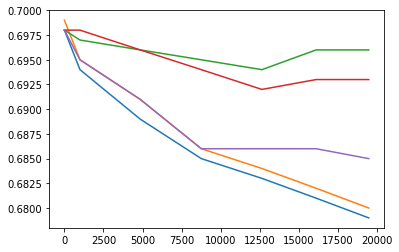

In [23]:
columns = file.columns[8:15]
pl, ax = plt.subplots()
for i in range(5):
    data_part = file[columns].iloc[i]
    data_part = np.array(data_part)
    ax.plot(time_labels, data_part)

In [16]:
train, test = train_test_split(file, test_size=0.2, random_state=42)

In [17]:
mean = []
var = []
for i in range(8, 15):
    data = np.array(train[train.columns[i]])
    print(train.columns[i])
    print(data)
    mean.append(data.mean())
    var.append(data.var())

Uobr_0
[0.698 0.698 0.697 0.699 0.69  0.7   0.701 0.696 0.698 0.701 0.697 0.693
 0.698 0.701 0.699 0.695 0.698 0.7   0.693 0.702 0.694 0.696 0.698 0.702
 0.701 0.698 0.7   0.698 0.701 0.702 0.701 0.697 0.702 0.697 0.7   0.702
 0.698 0.701 0.696 0.693 0.699 0.701 0.699 0.699 0.697 0.69  0.697 0.689
 0.691 0.689 0.692 0.7   0.697 0.699 0.703 0.7   0.697 0.701 0.697 0.688
 0.7   0.703 0.698 0.695 0.699 0.7   0.702 0.7   0.701 0.701 0.693 0.698
 0.698 0.693 0.698 0.7   0.697 0.688 0.69  0.698 0.698 0.698 0.701 0.697
 0.7   0.694 0.697 0.699 0.696 0.699 0.7   0.703 0.699 0.699 0.692 0.695
 0.697 0.699 0.701 0.697 0.699 0.702 0.697 0.702 0.703 0.703 0.698 0.699
 0.701 0.696 0.698 0.696 0.704 0.695 0.701 0.699 0.699 0.701 0.699 0.701
 0.703 0.699 0.688 0.698 0.701 0.699 0.701 0.701 0.699 0.7   0.696 0.699
 0.7  ]
Uobr_995
[0.698 0.697 0.695 0.699 0.683 0.696 0.701 0.692 0.698 0.7   0.695 0.693
 0.697 0.7   0.699 0.693 0.697 0.698 0.684 0.702 0.692 0.695 0.696 0.701
 0.7   0.698 0.698 0.695 0.

In [18]:
print(mean)
print(var)

[0.6980902255639098, 0.6963007518796993, 0.6930225563909774, 0.6895338345864661, 0.688593984962406, 0.6871503759398495, 0.6861353383458647]
[1.1886596189722447e-05, 2.0074961840691805e-05, 4.1104754367120445e-05, 0.00011913607326587077, 0.00014269229464638965, 0.00019127062015942032, 0.00020962078127649867]


In [24]:
mean = np.array(mean)
var = np.array(var)
time_labels_np = np.array(time_labels).reshape(-1, 1)
print(time_labels)
print(time_labels_np)

[0, 995, 4844, 8757, 12635, 16102, 19470]
[[    0]
 [  995]
 [ 4844]
 [ 8757]
 [12635]
 [16102]
 [19470]]


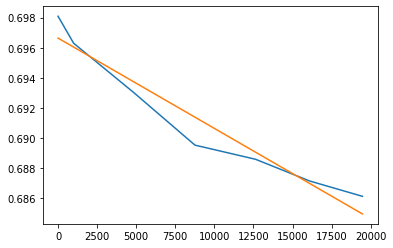

In [20]:
model_mean = LinearRegression()
model_mean.fit(time_labels_np, mean)
predict_values = model_mean.predict(time_labels_np)
lb, ax = plt.subplots()
ax.plot(time_labels, mean)
ax.plot(time_labels, predict_values)

[8.22319974e-06 1.89684279e-05 6.05346422e-05 1.02792007e-04
 1.44671399e-04 1.82112309e-04 2.18484097e-04]


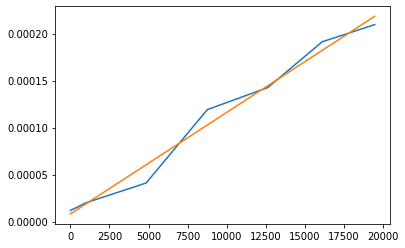

In [21]:
model_var = LinearRegression()
model_var.fit(time_labels_np, var)
predict_values = model_var.predict(time_labels_np)
lb, ax = plt.subplots()
ax.plot(time_labels, var)
ax.plot(time_labels, predict_values)
print(predict_values)

(array([ 5.,  1.,  4.,  4.,  1.,  8., 14., 16., 29., 51.]),
 array([0.639 , 0.6452, 0.6514, 0.6576, 0.6638, 0.67  , 0.6762, 0.6824,
        0.6886, 0.6948, 0.701 ]),
 <BarContainer object of 10 artists>)

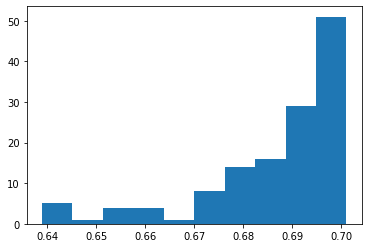

In [22]:
data1 = np.array(train[train.columns[14]])
plt.hist(data1)
